In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/temprature.xlsx', index_col='Date')

In [4]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


ploting a graph for the data

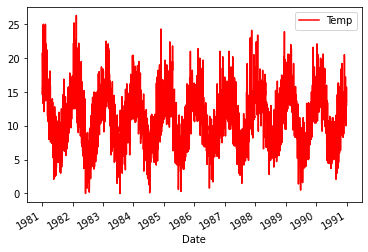

In [6]:
df.plot(color='red')

ploting the graph for a single year 

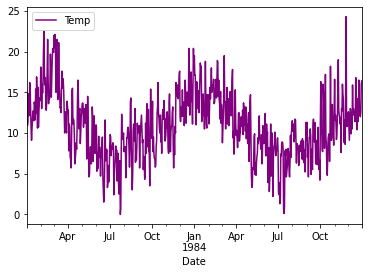

In [ ]:
df_1984 = df[(df.index>'1983-01-01') & (df.index<'1985-01-01')]
df_1984.plot(color='purple')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


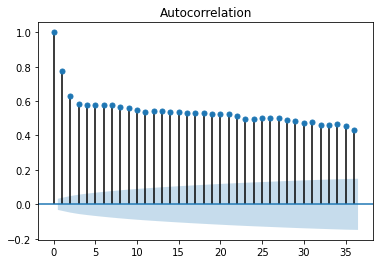

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df);

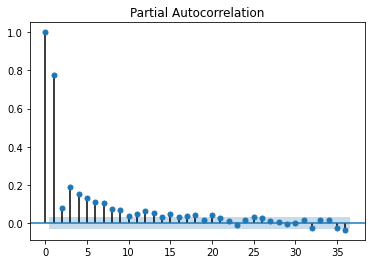

In [ ]:
plot_pacf(df);

In [12]:
import numpy as np

def sampling(sequence, n_steps):
  X, Y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    sam = i + n_steps
    # check if we are beyond the sequence
    if sam > len(sequence)-1:
      break
    x, y = sequence[i:sam], sequence[sam]
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)

In [13]:
#samling the x and y data

n_steps = 3
X, Y = sampling(df['Temp'].tolist(), n_steps)

In [14]:
for i in range(len(X)):
  print(X[i], Y[i])

[20.7 17.9 18.8] 14.6
[17.9 18.8 14.6] 15.8
[18.8 14.6 15.8] 15.8
[14.6 15.8 15.8] 15.8
[15.8 15.8 15.8] 17.4
[15.8 15.8 17.4] 21.8
[15.8 17.4 21.8] 20.0
[17.4 21.8 20. ] 16.2
[21.8 20.  16.2] 13.3
[20.  16.2 13.3] 16.7
[16.2 13.3 16.7] 21.5
[13.3 16.7 21.5] 25.0
[16.7 21.5 25. ] 20.7
[21.5 25.  20.7] 20.6
[25.  20.7 20.6] 24.8
[20.7 20.6 24.8] 17.7
[20.6 24.8 17.7] 15.5
[24.8 17.7 15.5] 18.2
[17.7 15.5 18.2] 12.1
[15.5 18.2 12.1] 14.4
[18.2 12.1 14.4] 16.0
[12.1 14.4 16. ] 16.5
[14.4 16.  16.5] 18.7
[16.  16.5 18.7] 19.4
[16.5 18.7 19.4] 17.2
[18.7 19.4 17.2] 15.5
[19.4 17.2 15.5] 15.1
[17.2 15.5 15.1] 15.4
[15.5 15.1 15.4] 15.3
[15.1 15.4 15.3] 18.8
[15.4 15.3 18.8] 21.9
[15.3 18.8 21.9] 19.9
[18.8 21.9 19.9] 16.6
[21.9 19.9 16.6] 16.8
[19.9 16.6 16.8] 14.6
[16.6 16.8 14.6] 17.1
[16.8 14.6 17.1] 25.0
[14.6 17.1 25. ] 15.0
[17.1 25.  15. ] 13.7
[25.  15.  13.7] 13.9
[15.  13.7 13.9] 18.3
[13.7 13.9 18.3] 22.0
[13.9 18.3 22. ] 22.1
[18.3 22.  22.1] 21.2
[22.  22.1 21.2] 18.4
[22.1 21.2

In [15]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, Y, epochs=200, verbose=0)

In [ ]:
x = np.array([17, 18, 19])
x = x.reshape((1, n_steps, 1))

In [ ]:
ypred = model.predict(x, verbose=0)
ypred

array([[17.378136]], dtype=float32)

In [ ]:
history = model.fit(X, Y, epochs=200, verbose=0)

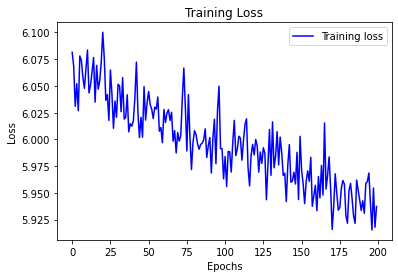

In [ ]:
import matplotlib.pyplot as plt
def visualize_loss(history, title):
    loss = history.history["loss"]
    #val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    #plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training Loss")

In [17]:
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', input_shape=(n_steps, 1), return_sequences=True))
model_1.add(Dense(10))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mse')

In [18]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 50)             10400     
                                                                 
 dense_1 (Dense)             (None, 3, 10)             510       
                                                                 
 dense_2 (Dense)             (None, 3, 1)              11        
                                                                 
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X, Y, epochs=200, verbose=1)

Epoch 1/200
114/114 [==============================] - 2s 4ms/step - loss: 29.9143
Epoch 2/200
114/114 [==============================] - 0s 4ms/step - loss: 7.9054
Epoch 3/200
114/114 [==============================] - 0s 4ms/step - loss: 6.9228
Epoch 4/200
114/114 [==============================] - 0s 4ms/step - loss: 6.7128
Epoch 5/200
114/114 [==============================] - 0s 4ms/step - loss: 6.4935
Epoch 6/200
114/114 [==============================] - 0s 4ms/step - loss: 6.4339
Epoch 7/200
114/114 [==============================] - 0s 4ms/step - loss: 6.3569
Epoch 8/200
114/114 [==============================] - 0s 4ms/step - loss: 6.3451
Epoch 9/200
114/114 [==============================] - 0s 4ms/step - loss: 6.4257
Epoch 10/200
114/114 [==============================] - 0s 4ms/step - loss: 6.3086
Epoch 11/200
114/114 [==============================] - 0s 4ms/step - loss: 6.4153
Epoch 12/200
114/114 [==============================] - 0s 4ms/step - loss: 6.3254
Epoch 13/200

In [20]:
x = np.array([17, 18, 19])
x = x.reshape((1, n_steps, 1))

In [21]:
ypred = model_1.predict(x, verbose=1)
ypred

1/1 [==============================] - 0s 275ms/step


array([[[0.10361473],
        [0.07913118],
        [0.03577093]]], dtype=float32)